In [17]:
# ! pip install xport

In [26]:
# !python -m xport BMX_G.XPT > bm.csv
# !python -m xport BPX_G.XPT > bp.csv
# !python -m xport DEMO_G.XPT > demographic.csv
# !python -m xport GHB_G.XPT > labs.csv

In [28]:
cd ..

/Users/mohamedmartino/Desktop/final-project


In [1]:
%matplotlib 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.metrics import accuracy_score as score
from sklearn.impute import SimpleImputer
import seaborn as sns

Using matplotlib backend: Qt5Agg


In [2]:
file_1 = pd.read_csv('resources/2013-2014/demographic.csv')
file_2 = pd.read_csv('resources/2013-2014/examination.csv')
file_3 = pd.read_csv('resources/2013-2014/labs.csv')
file_4 = pd.read_csv('resources/2015-2016/demographic.csv')
file_5 = pd.read_csv('resources/2015-2016/examination.csv')
file_6 = pd.read_csv('resources/2015-2016/labs.csv')
file_7 = pd.read_csv('resources/2015-2016/bp.csv')
file_8 = pd.read_csv('resources/2011-2012/bp.csv')
file_9 = pd.read_csv('resources/2011-2012/demographic.csv')
file_10 = pd.read_csv('resources/2011-2012/bm.csv')
file_11 = pd.read_csv('resources/2011-2012/labs.csv')

df_1 = pd.DataFrame(file_1)
df_2 = pd.DataFrame(file_2)
df_3 = pd.DataFrame(file_3)
df_4 = pd.DataFrame(file_4)
df_5 = pd.DataFrame(file_5)
df_6 = pd.DataFrame(file_6)
df_7 = pd.DataFrame(file_7)
df_8 = pd.DataFrame(file_8)
df_9 = pd.DataFrame(file_9)
df_10 = pd.DataFrame(file_10)
df_11 = pd.DataFrame(file_11)

# merged=reduce(lambda left,right: pd.merge(left, right, on=['SEQN'], how='inner'), dataframes_1)
# merged.dropna(how='all', axis=1)
# merged.dropna(how='all', axis=0)

dataframes_1 = [df_1,df_2,df_3]
dataframes_2 = [df_4,df_5,df_6,df_7]
dataframes_3 = [df_8,df_9,df_10,df_11]

df_1 = reduce(lambda left, right: pd.merge(left,right,on='SEQN'), dataframes_1)
df_2 = reduce(lambda left, right: pd.merge(left,right,on='SEQN'), dataframes_2)
df_3 = reduce(lambda left, right: pd.merge(left,right,on='SEQN'), dataframes_3)

print('2011-2012 Dataframe')
print('columns: ' + str(len(df_3.columns.tolist())))
print('rows: ' + str(len(df_3.index)))
print('-----------------------')
print('2013-2014 Dataframe')
print('columns: ' + str(len(df_1.columns.tolist())))
print('rows: ' + str(len(df_1.index)))
print('-----------------------')
print('2015-2016 Dataframe')
print('columns: ' + str(len(df_2.columns.tolist())))
print('rows: ' + str(len(df_2.index)))

#2015-2016 data does not contain grip strength
df1 = df_1.loc[:,['SEQN','RIDAGEYR','BPXSY2','BPXDI2','BMXWAIST','BMXBMI','BMXARMC','BPXPLS','LBXGH']]
df2 = df_2.loc[:,['SEQN','RIDAGEYR','BPXSY2','BPXDI2','BMXWAIST','BMXBMI','BMXARMC','BPXPLS','LBXGH']]
df3 = df_3.loc[:,['SEQN','RIDAGEYR','BPXSY2','BPXDI2','BMXWAIST','BMXBMI','BMXARMC','BPXPLS','LBXGH']]

2011-2012 Dataframe
columns: 100
rows: 6549
-----------------------
2013-2014 Dataframe
columns: 693
rows: 9813
-----------------------
2015-2016 Dataframe
columns: 93
rows: 6744


In [3]:
df = pd.concat([df1,df2,df3])
df = df.rename(columns ={
    'SEQN': 'seqn',
    'RIAGENDR': 'gender',
    'RIDAGEYR': 'age',
    'RIDRETH3': 'ethnicity',
    'DMDEDUC3': 'education_child',
    'DMDEDUC2': 'education_adult',
    'INDHHIN2': 'household_income',
    'BMXWAIST': 'waist_circumference',
    'MGDCGSZ': 'grip',
    'BMXBMI': 'bmi',
    'BMXARMC': 'arm_circumference',
    'BPXPLS': 'pulse_60s',
    'BPXSY2': 'systolic',
    'BPXDI2': 'diastolic',
    'LBXGH': 'glycohemoglobin'
})
df

seqn   age  systolic  diastolic  waist_circumference   bmi  \
0     73557.0  69.0     114.0       76.0                100.0  26.7   
1     73558.0  54.0     160.0       80.0                107.6  28.6   
2     73559.0  72.0     140.0       76.0                109.2  28.9   
3     73560.0   9.0     102.0       34.0                 61.0  17.1   
4     73561.0  73.0     134.0       88.0                  NaN  19.7   
5     73562.0  56.0     158.0       82.0                123.1  41.7   
6     73563.0   0.0       NaN        NaN                  NaN   NaN   
7     73564.0  61.0     124.0       80.0                110.8  35.7   
8     73566.0  56.0     124.0       72.0                 85.5  26.5   
9     73567.0  65.0     142.0       78.0                 93.7  22.0   
10    73568.0  26.0     100.0       62.0                 73.7  20.3   
11    73570.0   9.0     104.0       42.0                 65.6  17.4   
12    73571.0  76.0       NaN        NaN                122.1  34.4   
13    73572.0  10.0      88.0       54.0                 66.4  19.7   
14    73573.0  10.0      94.0       60.0                 72.5  20.0   
15    73574.0  33.0     124.0       66.0                 78.7  22.8   
16    73575.0   1.0       NaN        NaN                  NaN   NaN   
17    73576.0  16.0     110.0       62.0                 74.2  23.2   
18    73577.0  32.0     118.0       74.0                100.0  28.9   
19    73578.0  18.0     124.0       64.0                110.2  35.6   
20    73579.0  12.0     116.0       70.0                 62.6  15.5   
21    73580.0  38.0     118.0       66.0                107.4  35.9   
22    73581.0  50.0     132.0       80.0                 99.3  23.6   
23    73582.0  23.0      96.0       48.0                  NaN  18.6   
24    73583.0   7.0       NaN        NaN                 49.9  14.4   
25    73584.0  13.0     110.0       52.0                 77.0  25.3   
26    73585.0  28.0     106.0       74.0                 90.3  30.1   
27    73586.0   4.0       NaN        NaN                 53.7  15.5   
28    73587.0  14.0     110.0       68.0                115.9  38.7   
29    73588.0  11.0      98.0        0.0                 56.0  15.7   
...       ...   ...       ...        ...                  ...   ...   
6519  71874.0  24.0     100.0       58.0                 80.1  23.6   
6520  71875.0  42.0     100.0       62.0                 98.0  28.5   
6521  71876.0  14.0     126.0       58.0                 73.5  20.8   
6522  71877.0  72.0     154.0       76.0                101.6  25.4   
6523  71878.0  35.0     114.0       88.0                134.6  41.4   
6524  71879.0  24.0     126.0       60.0                 79.3  22.4   
6525  71880.0  46.0     128.0       82.0                121.6  37.5   
6526  71881.0  20.0     110.0       80.0                 87.4  25.7   
6527  71882.0  60.0     112.0       74.0                101.8  27.3   
6528  71883.0  42.0     124.0       78.0                 91.1  23.6   
6529  71884.0  49.0     110.0       68.0                 90.4  25.4   
6530  71885.0  35.0     100.0       66.0                 92.6  25.1   
6531  71886.0  61.0     114.0       78.0                 98.2  26.8   
6532  71887.0  68.0     122.0       64.0                 95.8  28.9   
6533  71888.0  67.0       NaN        NaN                129.1  36.8   
6534  71891.0  54.0     104.0       64.0                 96.0  28.4   
6535  71895.0  31.0     106.0       74.0                 74.0  20.6   
6536  71897.0  68.0     136.0       60.0                115.8  34.1   
6537  71898.0  65.0     146.0       82.0                 98.5  29.4   
6538  71901.0  48.0     120.0       74.0                  NaN  59.7   
6539  71902.0  67.0     142.0       74.0                100.1  40.1   
6540  71904.0  30.0       NaN        NaN                  NaN  18.0   
6541  71907.0  80.0     150.0       70.0                  NaN  23.2   
6542  71908.0  66.0     114.0       68.0                114.6  35.1   
6543  71909.0  28.0     126.0    

In [4]:
# WebMD definition of diabetes based on glycated hemoglobin levels.
# 3 classification labels

conditions = [
    (df['glycohemoglobin'] < 5.7),
    (df['glycohemoglobin'] >= 5.7) & (df['glycohemoglobin']<=6.4),
    (df['glycohemoglobin']>6.4)
]

diagnosis = [0,1,2]

df['diabetes'] = np.select(conditions, diagnosis)

# dropping rows where glycohemoglobin and pulse (if pulse is null --> syst/diast is null) is NaN 
# dropping rows where waist circum is null since there are 539 missing
# dropping rows where sys in null; 156 missing

df.dropna(axis=0, subset=['glycohemoglobin','pulse_60s','waist_circumference','systolic'],inplace=True)
df.isna().sum()

seqn                    0
age                     0
systolic                0
diastolic               0
waist_circumference     0
bmi                    40
arm_circumference      17
pulse_60s               0
glycohemoglobin         0
diabetes                0
dtype: int64

In [5]:
df.describe()

seqn           age      systolic     diastolic  \
count  17481.000000  17481.000000  17481.000000  17481.000000   
mean   78324.250672     42.534123    121.125908     67.831474   
std     9215.453417     20.370237     17.902693     13.932765   
min    62161.000000     12.000000     66.000000      0.000000   
25%    69816.000000     24.000000    108.000000     60.000000   
50%    78964.000000     42.000000    118.000000     68.000000   
75%    86225.000000     60.000000    130.000000     76.000000   
max    93702.000000     80.000000    238.000000    134.000000   

       waist_circumference           bmi  arm_circumference     pulse_60s  \
count         17481.000000  17441.000000       17464.000000  17481.000000   
mean             96.195481     28.206192          32.360009     73.231852   
std              17.600744      7.028390           5.415944     11.876340   
min              54.600000     13.400000          17.100000      0.000000   
25%              83.100000     23.200000          28.600000     64.000000   
50%              95.000000     27.100000          32.000000     72.000000   
75%             107.000000     31.900000          35.700000     80.000000   
max             177.900000     82.100000          59.400000    172.000000   

       glycohemoglobin      diabetes  
count     17481.000000  17481.000000  
mean          5.684217      0.436760  
std           1.046114      0.662252  
min           3.500000      0.000000  
25%           5.200000      0.000000  
50%           5.500000      0.000000  
75%           5.800000      1.000000  
max          17.800000      2.000000

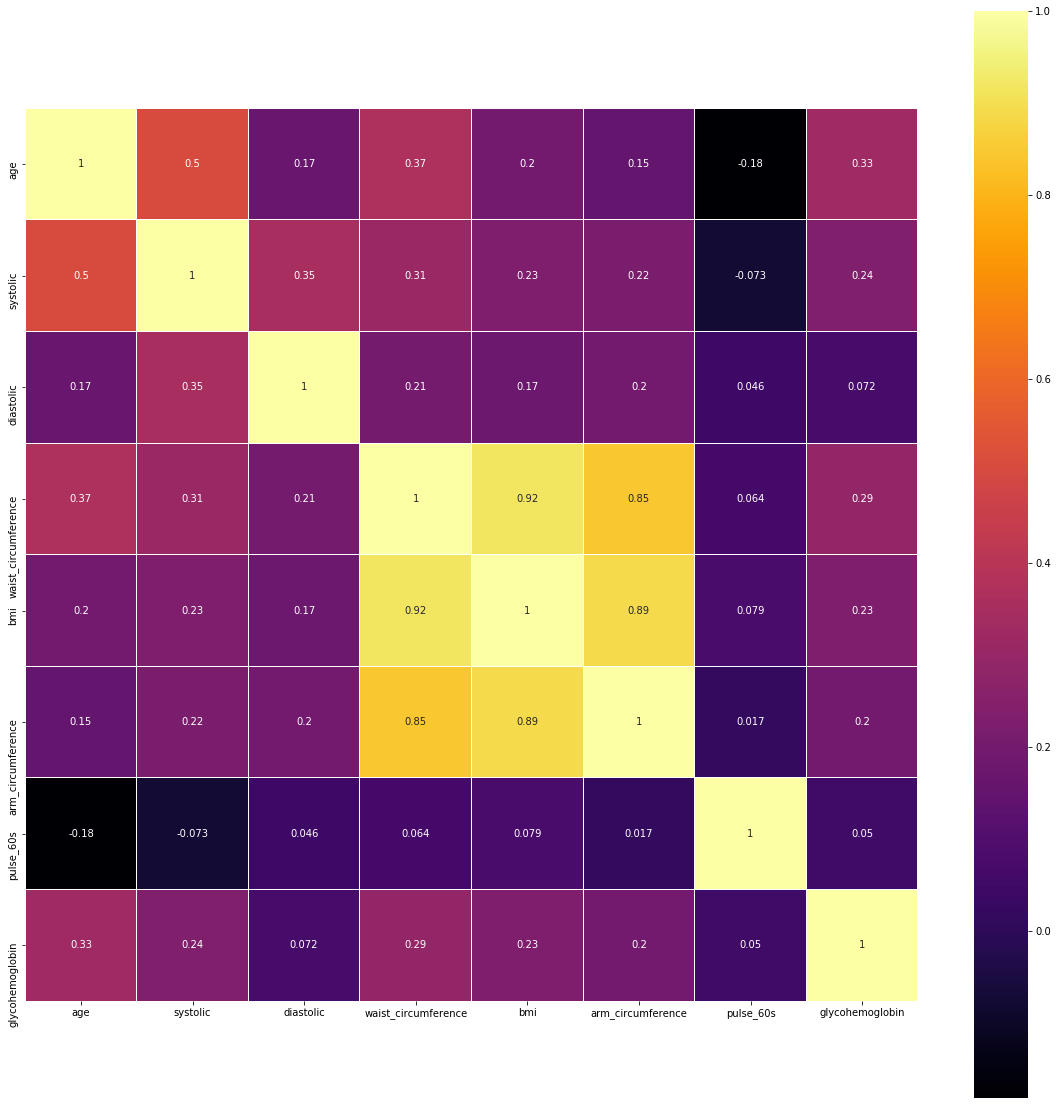

In [9]:
cm = plt.cm.inferno
plt.figure(figsize= (20,20))
sns.heatmap(df.drop('diabetes', axis=1).drop('seqn', axis=1).\
            astype(float).corr(), linewidths= 0.1, vmax=1, square=True, cmap=cm, annot=True)
plt.savefig('corr_matrix.png', transparent=True)

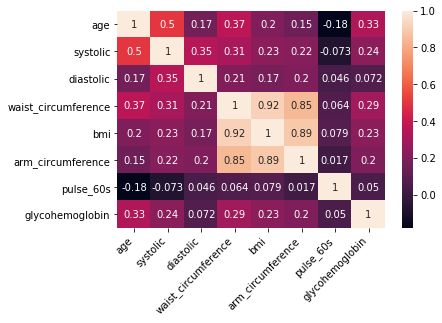

In [19]:
df_corr = df.drop('diabetes', axis=1).drop('seqn', axis=1).corr()
ax = sns.heatmap(df_corr, annot=True)
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom, top-0.5)
ax.set_xticklabels(labels = ax.get_xticklabels(),rotation = 45, horizontalalignment='right')
plt.savefig('corr_matrix.png', transparent=True, dpi=300, bbox_inches='tight')

In [20]:
# Proportions of labels in cleaned datset
print('Label Proportion in Clean Dataset')
print('non-diabetic: ' + str(df['diabetes'].value_counts()[0]/df['diabetes'].value_counts().sum()))
print('pre-diabetic: ' + str(df['diabetes'].value_counts()[1]/df['diabetes'].value_counts().sum()))
print('diabetic: ' + str(df['diabetes'].value_counts()[2]/df['diabetes'].value_counts().sum()))

Label Proportion in Clean Dataset
non-diabetic: 0.6595160459927921
pre-diabetic: 0.24420799725416167
diabetic: 0.09627595675304616


In [37]:
df_final = df.drop('seqn',axis=1).drop('glycohemoglobin',axis=1).copy()
list(enumerate(list(df_final)))

[(0, 'age'),
 (1, 'systolic'),
 (2, 'diastolic'),
 (3, 'waist_circumference'),
 (4, 'bmi'),
 (5, 'arm_circumference'),
 (6, 'pulse_60s'),
 (7, 'diabetes')]

In [38]:
features = df_final.iloc[:,0:7].values
labels = df_final.iloc[:,7].values

from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values= 'NaN', strategy='median', axis=0)
imputer.fit(features[:, [4,5]])
features[:, [4,5]] = imputer.fit_transform(features[:, [4,5]])

df_features = pd.DataFrame(features)

X = df_features.iloc[:,:].values
y = labels

df_features.isnull().sum()

/Users/mohamedmartino/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

## Random Forest Classifier

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, train_size=0.8)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0,criterion='entropy')
classifier.fit(X_train, y_train)
y_pred = (classifier.predict(X_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
score(y_test, y_pred)

[[2025  244   37]
 [ 505  311   38]
 [ 135  155   47]]


0.6814412353445811

## PCA + Random Forest

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.8)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# PCA + RandomForest
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# explained_variance

classifier = RandomForestClassifier(n_estimators=100, random_state=0,criterion='entropy')
classifier.fit(X_train, y_train)
y_pred = (classifier.predict(X_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)
score(y_test, y_pred)

[[1939  307   60]
 [ 551  244   59]
 [ 180  126   31]]


0.6331140977981127

## Logistic Regression

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, train_size=0.8)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# from sklearn.linear_model import LogisticRegression
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_

# explained_variance
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
score(y_test, y_pred)

[[2083  213   10]
 [ 548  293   13]
 [ 161  162   14]]


/Users/mohamedmartino/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mohamedmartino/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6834429511009437

## PCA + Logistic Regression

In [43]:
# PCA + Logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, train_size=0.8)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# explained_variance

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
score(y_test, y_pred)

[[2115  190    1]
 [ 655  195    4]
 [ 215  121    1]]


/Users/mohamedmartino/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mohamedmartino/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.660852158993423

## Naive Bayes

In [44]:
# PCA + Logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, train_size=0.8)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# from sklearn.linear_model import LogisticRegression
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_

# explained_variance
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
score(y_test, y_pred)

[[1826  402   78]
 [ 410  343  101]
 [ 106  139   92]]


0.6465541893051187

## Naive Bayes + PCA

In [48]:
# PCA + Logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, train_size=0.8)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# explained_variance
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
score(y_test, y_pred)

[[2067  200   39]
 [ 571  245   38]
 [ 176  129   32]]


0.6702888189877038

## SVM

In [49]:
# PCA + Logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, train_size=0.8)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# from sklearn.linear_model import LogisticRegression
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_

# explained_variance
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
score(y_test, y_pred)

[[2199  107    0]
 [ 707  147    0]
 [ 226  111    0]]


0.6708607377752359

## PCA + SVM

In [50]:
# PCA + Logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, train_size=0.8)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_

# explained_variance
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
score(y_test, y_pred)

[[2306    0    0]
 [ 854    0    0]
 [ 337    0    0]]


0.6594223620245925

## Neural Network

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Importing Keras packages
import keras
from keras.models import Sequential
from keras.layers import Dense


#Initializing the ANN
classifier = Sequential()

#Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=8,init='uniform',activation='relu',input_dim=7))

#Adding the second hidden layer
classifier.add(Dense(output_dim=8,init='uniform',activation='relu'))

#Adding the output layer
classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))

#Making predictions and evaluating the model
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Fit ANN to training set
classifier.fit(X_train,y_train,epochs=100)

#Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

Using TensorFlow backend.
/Users/mohamedmartino/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=8, kernel_initializer="uniform")`
/Users/mohamedmartino/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=8, kernel_initializer="uniform")`
/Users/mohamedmartino/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


Epoch 1/100
12236/12236 [==============================] - 0s 39us/step - loss: 0.5275 - accuracy: 0.6417
Epoch 2/100
12236/12236 [==============================] - 0s 31us/step - loss: 0.3808 - accuracy: 0.6603
Epoch 3/100
12236/12236 [==============================] - 0s 29us/step - loss: 0.3680 - accuracy: 0.6662
Epoch 4/100
12236/12236 [==============================] - 0s 29us/step - loss: 0.3596 - accuracy: 0.6675
Epoch 5/100
12236/12236 [==============================] - 0s 30us/step - loss: 0.3528 - accuracy: 0.6702
Epoch 6/100
12236/12236 [==============================] - 0s 29us/step - loss: 0.3465 - accuracy: 0.6733
Epoch 7/100
12236/12236 [==============================] - 0s 29us/step - loss: 0.3412 - accuracy: 0.6745
Epoch 8/100
12236/12236 [==============================] - 0s 28us/step - loss: 0.3329 - accuracy: 0.6755
Epoch 9/100
12236/12236 [==============================] - 0s 32us/step - loss: 0.3222 - accuracy: 0.6770
Epoch 10/100
12236/12236 [====================

array([[2707,  774,    0],
       [ 524,  763,    0],
       [  66,  411,    0]])

In [52]:
# bagginclassiffier

In [58]:
# PCA + Logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, train_size=0.8)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# from sklearn.linear_model import LogisticRegression
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_

# explained_variance
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifier = BaggingClassifier(base_estimator= DecisionTreeClassifier(),\
                               max_samples = 0.5, max_features = 0.5, \
                               bootstrap = False, bootstrap_features = False)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
score(y_test, y_pred)

[[2088  183   35]
 [ 640  173   41]
 [ 212   98   27]]


0.654275092936803